In [1]:
import pickle
out = open("xbox_games.pkl","rb")
all_xbox_games = pickle.load(out)

def read_game_pass_names(file_name):
    with open(file_name, 'r') as file:
        text = file.read()
    return [name.strip().lower().replace("’", "'") for name in text.split("\n") if name]

game_pass_games_names = read_game_pass_names("game_pass_games_list.txt")

is_game_pass_game = lambda game: game["name"].lower() in game_pass_games_names

found_games = [game for game in all_xbox_games if is_game_pass_game(game)]

(array([200.,  98.,  27.,  11.,   4.,   3.,   4.,   1.,   0.,   2.]),
 array([ 0. ,  4.6,  9.2, 13.8, 18.4, 23. , 27.6, 32.2, 36.8, 41.4, 46. ]),
 <BarContainer object of 10 artists>)

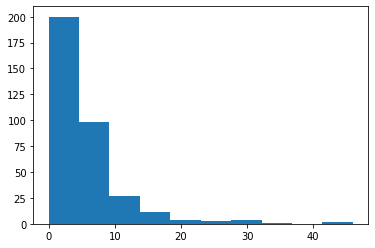

In [2]:
import matplotlib.pyplot as plt
plt.hist([game["playtime"] for game in found_games])

(array([ 18.,   0.,   0.,   0.,   3.,  11.,  31., 106., 116.,  65.]),
 array([0.   , 0.457, 0.914, 1.371, 1.828, 2.285, 2.742, 3.199, 3.656,
        4.113, 4.57 ]),
 <BarContainer object of 10 artists>)

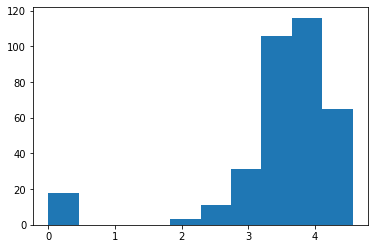

In [3]:
plt.hist([game["rating"] for game in found_games])

In [4]:
metrics = ['name', 'playtime', 'released', 'rating', 'rating_top', 'ratings_count', 'suggestions_count', 'reviews_text_count', 'added', 'reviews_count']
more_complex_metrics = ['genres', 'ratings', 'esrb_rating']

In [31]:
[genre['slug'] for genre in found_games[0]['genres']]

['action', 'role-playing-games-rpg']

In [34]:
[(rating['title'], rating['count']) for rating in found_games[0]['ratings']]

[('exceptional', 2342), ('recommended', 1308), ('meh', 367), ('skip', 88)]

In [36]:
found_games[0]['esrb_rating']['slug']

'mature'

In [13]:
metrics = ['name', 'playtime', 'released', 'rating', 'rating_top', 'ratings_count', 'suggestions_count', 'reviews_text_count', 'added', 'reviews_count', 'esrb_rating']

def genre_rules(game):
    game_slug = game['slug']
    genre_slugs = [genre['slug'] for genre in game['genres']]
    return [f"genre({game_slug},{genre_slug})" for genre_slug in genre_slugs]

def rating_rules(game):
    game_slug = game['slug']
    ratings = [(rating['title'], rating['count']) for rating in game['ratings']]
    return [f"ratings({game_slug},{title},{count})" for (title, count) in ratings]

def get_metric_value(game, metric):
    if metric in ['name', 'released']:
        return "\"" + game[metric] + "\""
    elif metric == 'esrb_rating':
        return game[metric]['slug'] if game[metric] else None
    return game[metric]

def generate_rules_for_game(game):
    rules = []
    game_slug = game['slug']
    for metric in metrics:
        metric_value = get_metric_value(game, metric)
        if metric_value: rules.append(f"{metric}({game_slug},{metric_value})")
    rules += genre_rules(game)
    rules += rating_rules(game)
    return rules

def generate_rules(games):
    rules = []
    for game in games:
        rules += generate_rules_for_game(game)
    # Sort rules - rules of the same type should be grouped together.
    rules = sorted(rules)
    return ".\n".join(rules) + "."

In [13]:
print('\n'.join([f"image({game['slug']}, \"{game['background_image']}\")." for game in found_games]))

image(the-elder-scrolls-v-skyrim, "https://media.rawg.io/media/games/7cf/7cfc9220b401b7a300e409e539c9afd5.jpg").
image(fallout-4, "https://media.rawg.io/media/games/d82/d82990b9c67ba0d2d09d4e6fa88885a7.jpg").
image(payday-2, "https://media.rawg.io/media/games/73e/73eecb8909e0c39fb246f457b5d6cbbe.jpg").
image(terraria, "https://media.rawg.io/media/games/f46/f466571d536f2e3ea9e815ad17177501.jpg").
image(batman-arkham-knight, "https://media.rawg.io/media/games/310/3106b0e012271c5ffb16497b070be739.jpg").
image(mirrors-edge, "https://media.rawg.io/media/games/8e4/8e4de3f54ac659e08a7ba6a2b731682a.jpg").
image(hollow-knight, "https://media.rawg.io/media/games/4cf/4cfc6b7f1850590a4634b08bfab308ab.jpg").
image(wolfenstein-the-new-order, "https://media.rawg.io/media/games/c80/c80bcf321da44d69b18a06c04d942662.jpg").
image(prey, "https://media.rawg.io/media/games/e6d/e6de699bd788497f4b52e2f41f9698f2.jpg").
image(dead-space, "https://media.rawg.io/media/games/ebd/ebdbb7eb52bd58b0e7fa4538d9757b60.jp

In [8]:
found_games[0].keys()

dict_keys(['slug', 'name', 'playtime', 'platforms', 'stores', 'released', 'tba', 'background_image', 'rating', 'rating_top', 'ratings', 'ratings_count', 'reviews_text_count', 'added', 'added_by_status', 'metacritic', 'suggestions_count', 'updated', 'id', 'score', 'clip', 'tags', 'esrb_rating', 'user_game', 'reviews_count', 'saturated_color', 'dominant_color', 'short_screenshots', 'parent_platforms', 'genres'])